In [ ]:
import numpy as np
import pandas as pd
# import matplotlib as mpl
# import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(16,9)})
nds_teal = '#037F9B'

In [33]:
pnl = pd.read_csv('mev-pnl.csv')
pnl['margin'] = pnl['pnl'] / pnl['gross_profit']
pnl['week_id'] = pnl['block_number'] // 44000

# The bot generates 2-9 ETH profit per week

<AxesSubplot:xlabel='week_id', ylabel='pnl'>

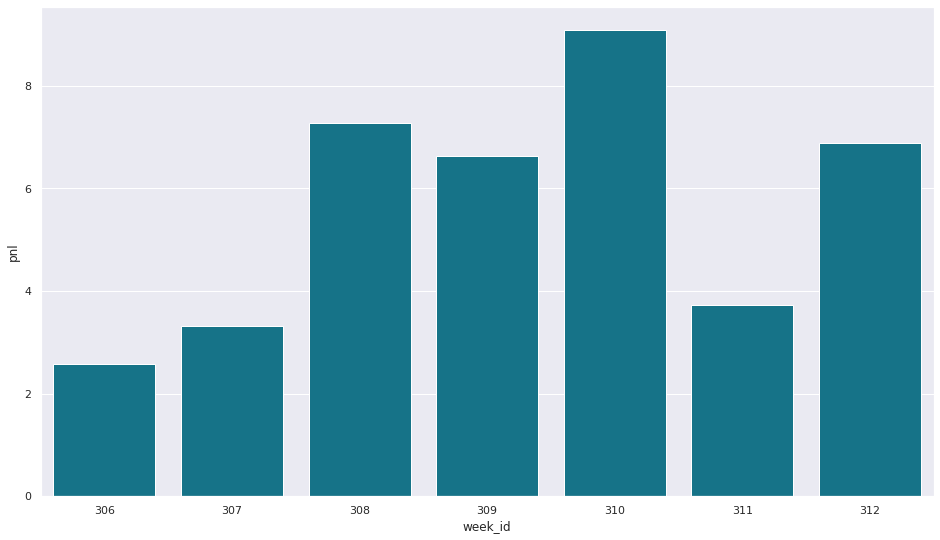

In [ ]:
sns.barplot(data=pnl, x='week_id', y='pnl', estimator=sum, ci=None, color=nds_teal)

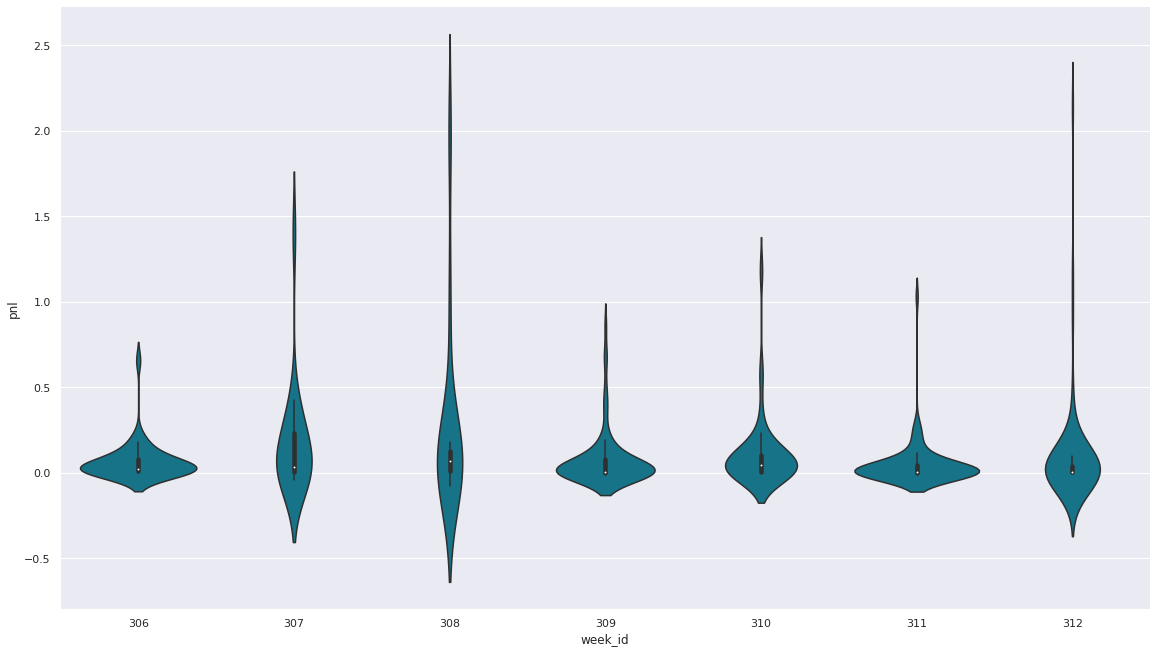

In [ ]:
sns.catplot(data=pnl, x="week_id", y='pnl', kind="violin", color=nds_teal,
            height=9, aspect=16/9)

# The bot aims for 50-50 profit sharing with miners 

<AxesSubplot:xlabel='miner_tip', ylabel='pnl'>

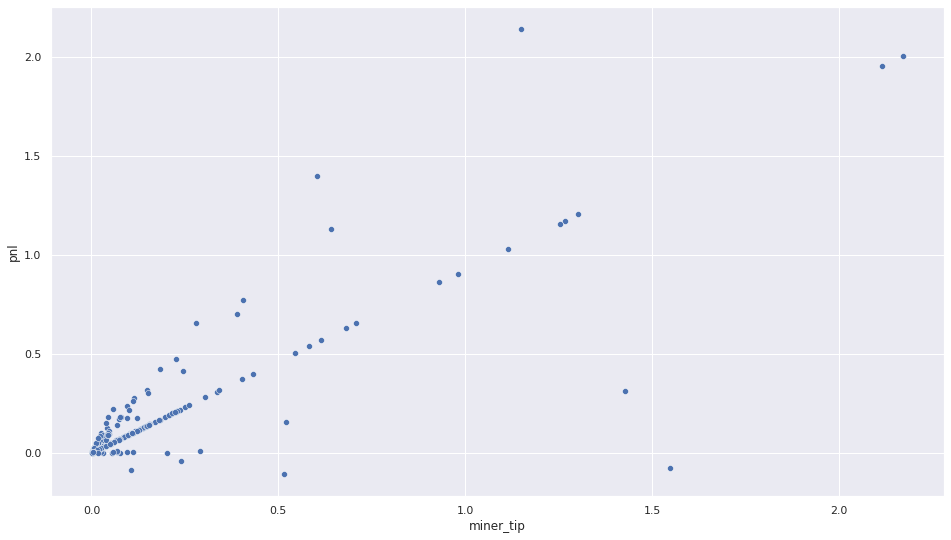

In [29]:
sns.scatterplot(data=pnl, x='miner_tip', y='pnl')

# Common MEV strategies are competitive. Margin and PnL are eroding

<AxesSubplot:xlabel='block_number', ylabel='margin'>

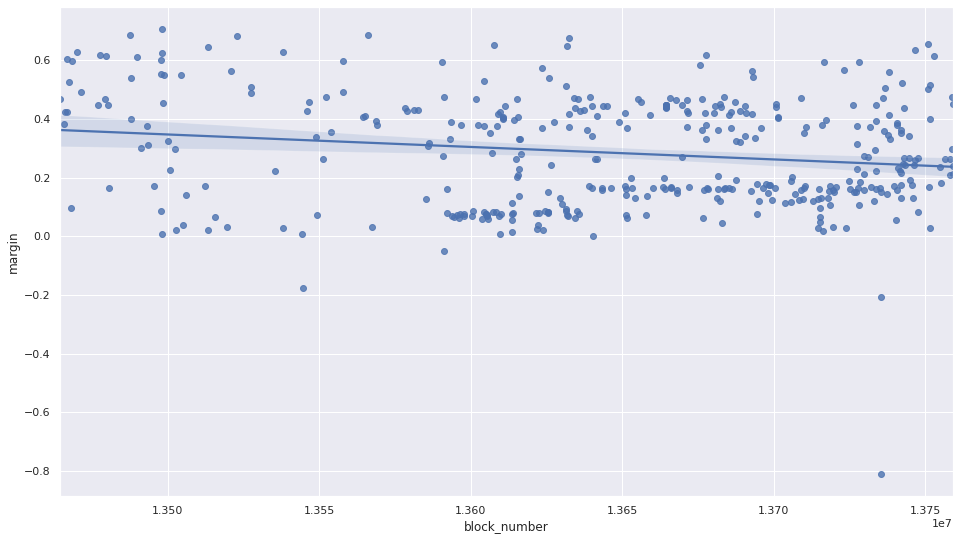

In [58]:
sns.regplot(data=pnl, x="block_number", y='margin')

<AxesSubplot:xlabel='block_number', ylabel='pnl'>

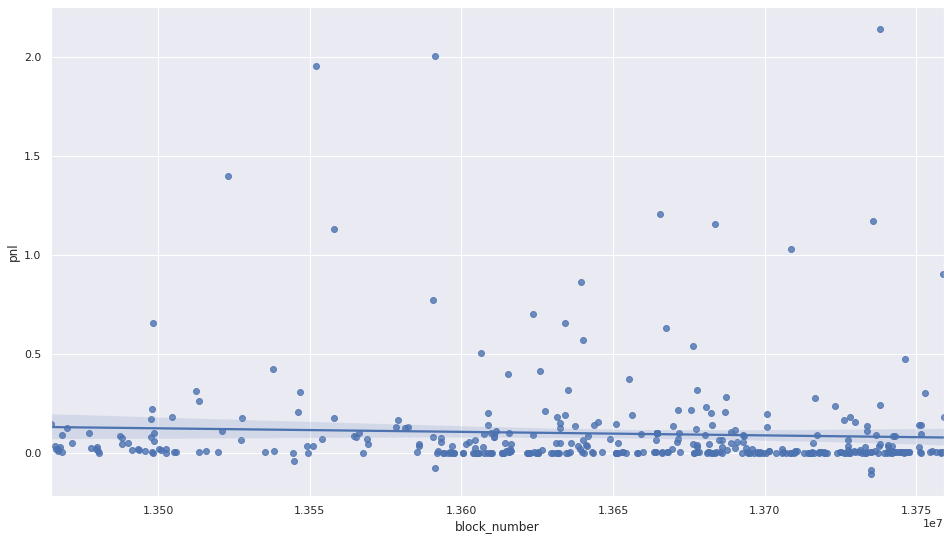

In [36]:
sns.regplot(data=pnl, x="block_number", y='pnl')